In [1]:
# confusion matrix 수식 https://scikit-learn.org/stable/modules/model_evaluation.html
import os
import pandas as pd
import numpy as np
import sklearn.metrics as metrics
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

import seaborn as sns
import matplotlib.pyplot as plt

os.chdir("C:/Users/user/vis") #confusion matrix 수식

C:\Users\user\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
times = pd.read_excel("times_final.xlsx")
cwur  = pd.read_excel("cwur_final.xlsx")
shanghai  = pd.read_excel("shanghai_final.xlsx")

In [9]:
shanghai98 = shanghai.groupby('year').head(98)
cwur98 = cwur.groupby('year').head(98)
times98 = times.groupby('year').head(98)

In [11]:
shanghai98

,world_rank,university_name,national_rank,total_score,alumni,award,hici,ns,pub,pcp,year
0,1,Harvard University,1,100.0,100.0,100.0,100.0,100.0,100.0,71.1,2012
1,2,Stanford University,2,72.8,38.0,79.7,88.9,71.6,69.6,49.2,2012
2,3,Massachusetts Institute of Technology (MIT),3,71.8,69.0,83.2,68.2,69.2,61.6,64.1,2012
3,4,"University of California, Berkeley",4,71.6,67.5,80.9,69.7,68.5,68.1,53.4,2012
4,5,University of Cambridge,1,69.8,80.3,97.2,54.6,55.0,65.9,52.1,2012
...,...,...,...,...,...,...,...,...,...,...,...
975,93,"University of California, Santa Cruz",47,24.5,0.0,0.0,37.9,33.9,29.0,37.6,2015
976,93,University of Utah,47,24.5,0.0,11.5,26.5,25.5,46.7,18.7,2015
977,96,McMaster University,4,24.4,12.6,18.8,23.2,15.1,44.5,22.5,2015
978,97,University of Bonn,4,24.3,15.4,19.8,17.4,21.1,39.8,25.9,2015


In [12]:
# 25등까지 1그룹, 26~75까지 2그룹, 76~100 3그룹
def rank_data(x):
    if x <= 25:
        return(1)
    elif x <= 75:
        return(2)
    else :
        return(3)

In [13]:
def score_cal(y,p):
    # sklearn 을 이용하면 전부 계산해준다.
    f1_score = metrics.f1_score(y , p, average  = "weighted")
    accuracy = metrics.accuracy_score(y , p)
    precision = metrics.precision_score(y , p, average  = "weighted")
    recall = metrics.recall_score(y , p, average  = "weighted")

    tmp = pd.DataFrame({"f1_score":[f1_score],
                           "accuracy":[accuracy],
                           "precision":[precision],
                           "recall":[recall]})
    return(tmp)

# Year 2012

In [14]:
times2012 = times98[times98['year'] == 2012]
cwur2012 = cwur98[cwur98['year'] == 2012]
shanghai2012 = shanghai98[shanghai98['year'] == 2012]

times2012 = times2012[["world_rank","university_name"]].rename(columns={"world_rank":"times_world_rank"}).head(100)
cwur2012 = cwur2012[["world_rank","institution"]].rename(columns={"world_rank":"cwur_world_rank","institution":"university_name"}).head(100)
shanghai2012 = shanghai2012[["world_rank","university_name"]].rename(columns={"world_rank":"shanghai_world_rank"}).head(100)

In [15]:
times2012['times_world_rank'] = times2012['times_world_rank'].apply(lambda x : rank_data(x))
cwur2012['cwur_world_rank'] = cwur2012['cwur_world_rank'].apply(lambda x : rank_data(x))
shanghai2012['shanghai_world_rank'] = shanghai2012['shanghai_world_rank'].apply(lambda x : rank_data(x))

In [16]:
data2012 = pd.merge(pd.merge(times2012,cwur2012),shanghai2012)
data2012.shape #43개의 대학이 겹침

(41, 4)

data2012

### Times vs CWUR

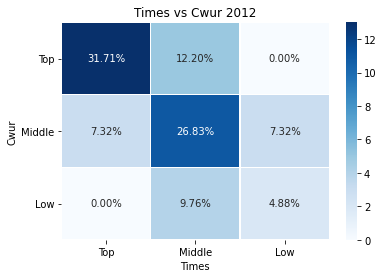

In [17]:
cf_matrix = confusion_matrix(data2012.times_world_rank,data2012.cwur_world_rank )
sns.heatmap(cf_matrix, annot=(cf_matrix/cf_matrix.sum()).round(4), fmt='.2%',
            cmap='Blues',linewidths = .1,
           xticklabels = ['Top','Middle','Low'],
            yticklabels=['Top','Middle','Low'])
plt.title('Times vs Cwur 2012', fontsize=12)
plt.xlabel("Times", fontsize =10)
plt.ylabel("Cwur", fontsize =10)
plt.yticks(rotation=360) 
plt.savefig('Times vs Cwur 2012' + '.png', width=150,height = 150)  

In [18]:
score_cal(data2012.times_world_rank,data2012.cwur_world_rank)

,f1_score,accuracy,precision,recall
0,0.635479,0.634146,0.643293,0.634146


### Times vs Shanghai

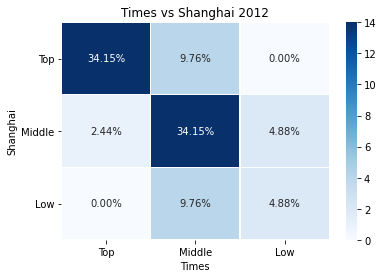

In [19]:
cf_matrix = confusion_matrix(data2012.times_world_rank,data2012.shanghai_world_rank )
sns.heatmap(cf_matrix, annot=(cf_matrix/cf_matrix.sum()).round(4), fmt='.2%', cmap='Blues',linewidths = .1,
           xticklabels = ['Top','Middle','Low'],yticklabels=['Top','Middle','Low'])
plt.title('Times vs Shanghai 2012', fontsize=12)
plt.xlabel("Times", fontsize =10)
plt.ylabel("Shanghai", fontsize =10)
plt.yticks(rotation=360) 
plt.savefig('Times vs Shanghai 2012' + '.png', width=150,height = 150)  

In [20]:
score_cal(data2012.times_world_rank,data2012.shanghai_world_rank)

,f1_score,accuracy,precision,recall
0,0.728728,0.731707,0.746785,0.731707


### CWUR vs Shanghai

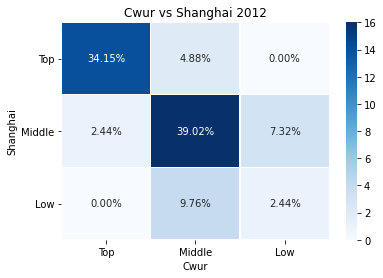

In [21]:
cf_matrix = confusion_matrix(data2012.cwur_world_rank,data2012.shanghai_world_rank )
sns.heatmap(cf_matrix, annot=(cf_matrix/cf_matrix.sum()).round(4), fmt='.2%', cmap='Blues',linewidths = .1,
           xticklabels = ['Top','Middle','Low'],yticklabels=['Top','Middle','Low'])
plt.title('Cwur vs Shanghai 2012', fontsize=12)
plt.xlabel("Cwur", fontsize =10)
plt.ylabel("Shanghai", fontsize =10)
plt.yticks(rotation=360) 
plt.savefig('Cwur vs Shanghai 2012' + '.png', width=150,height = 150)  

In [23]:
score_cal(data2012.cwur_world_rank,data2012.shanghai_world_rank)

,f1_score,accuracy,precision,recall
0,0.751239,0.756098,0.749483,0.756098


# Year 2013

In [25]:
times2013 = times98[times98['year'] == 2013]
cwur2013 = cwur98[cwur98['year'] == 2013]
shanghai2013 = shanghai98[shanghai98['year'] == 2013]

times2013 = times2013[["world_rank","university_name"]].rename(columns={"world_rank":"times_world_rank"}).head(100)
cwur2013 = cwur2013[["world_rank","institution"]].rename(columns={"world_rank":"cwur_world_rank","institution":"university_name"}).head(100)
shanghai2013 = shanghai2013[["world_rank","university_name"]].rename(columns={"world_rank":"shanghai_world_rank"}).head(100)

times2013['times_world_rank'] = times2013['times_world_rank'].apply(lambda x : rank_data(x))
cwur2013['cwur_world_rank'] = cwur2013['cwur_world_rank'].apply(lambda x : rank_data(x))
shanghai2013['shanghai_world_rank'] = shanghai2013['shanghai_world_rank'].apply(lambda x : rank_data(x))

data2013 = pd.merge(pd.merge(times2013,cwur2013),shanghai2013)
data2013.shape #37개의 대학이 겹침

(37, 4)

In [26]:
data2013

,times_world_rank,university_name,cwur_world_rank,shanghai_world_rank
0,1,California Institute of Technology,1,1
1,1,Stanford University,1,1
2,1,University of Oxford,1,1
3,1,Harvard University,1,1
4,1,Princeton University,1,1
5,1,University of Cambridge,1,1
6,1,"University of California, Berkeley",1,1
7,1,University of Chicago,1,1
8,1,Yale University,1,1
9,1,"University of California, Los Angeles",1,1


### Times vs CWUR

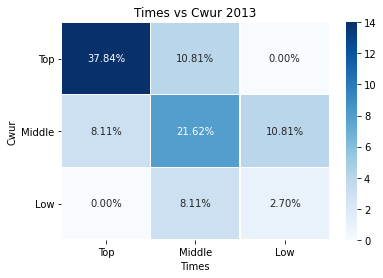

In [27]:
cf_matrix = confusion_matrix(data2013.times_world_rank,data2013.cwur_world_rank )
sns.heatmap(cf_matrix, annot=(cf_matrix/cf_matrix.sum()).round(4), fmt='.2%', cmap='Blues',linewidths = .1,
            xticklabels = ['Top','Middle','Low'],yticklabels=['Top','Middle','Low'])
plt.title('Times vs Cwur 2013', fontsize=12)
plt.xlabel("Times", fontsize =10)
plt.ylabel("Cwur", fontsize =10)
plt.yticks(rotation=360) 
score_cal(data2013.times_world_rank,data2013.cwur_world_rank)

plt.savefig('Times vs Cwur 2013' + '.png', width=150,height = 150) 

In [28]:
score_cal(data2013.times_world_rank,data2013.cwur_world_rank)

,f1_score,accuracy,precision,recall
0,0.629429,0.621622,0.638474,0.621622


### Times vs Shanghai

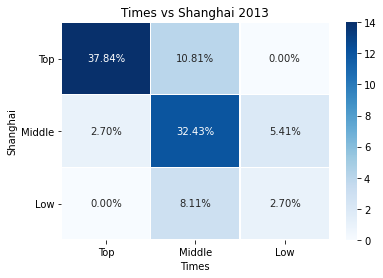

In [23]:
cf_matrix = confusion_matrix(data2013.times_world_rank,data2013.shanghai_world_rank )
sns.heatmap(cf_matrix, annot=(cf_matrix/cf_matrix.sum()).round(4), fmt='.2%', cmap='Blues',linewidths = .1,
            xticklabels = ['Top','Middle','Low'],yticklabels=['Top','Middle','Low'])
plt.title('Times vs Shanghai 2013', fontsize=12)
plt.xlabel("Times", fontsize =10)
plt.ylabel("Shanghai", fontsize =10)
plt.yticks(rotation=360) 

score_cal(data2013.times_world_rank,data2013.shanghai_world_rank)

plt.savefig('Times vs Shanghai 2013' + '.png', width=150,height = 150) 

In [28]:
score_cal(data2013.times_world_rank,data2013.shanghai_world_rank)

,f1_score,accuracy,precision,recall
0,0.729833,0.72973,0.746136,0.72973


### CWUR vs Shanghai

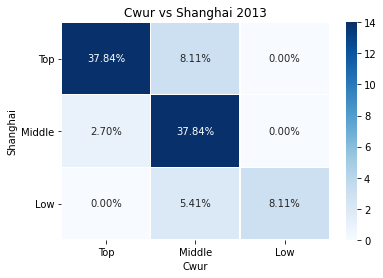

In [85]:
cf_matrix = confusion_matrix(data2013.cwur_world_rank,data2013.shanghai_world_rank )
sns.heatmap(cf_matrix, annot=(cf_matrix/cf_matrix.sum()).round(4), fmt='.2%', cmap='Blues',linewidths = .1,
            xticklabels = ['Top','Middle','Low'],yticklabels=['Top','Middle','Low'])
plt.title('Cwur vs Shanghai 2013', fontsize=12)
plt.xlabel("Cwur", fontsize =10)
plt.ylabel("Shanghai", fontsize =10)
plt.yticks(rotation=360) 
score_cal(data2013.cwur_world_rank,data2013.shanghai_world_rank)

plt.savefig('Cwur vs Shanghai 2013' + '.png', width=150,height = 150) 


In [29]:
score_cal(data2013.cwur_world_rank,data2013.shanghai_world_rank)

,f1_score,accuracy,precision,recall
0,0.837242,0.837838,0.862684,0.837838


# Year 2014

In [30]:
times2014 = times[times['year'] == 2014]
cwur2014 = cwur[cwur['year'] == 2014]
shanghai2014 = shanghai[shanghai['year'] == 2014]

times2014 = times2014[["world_rank","university_name"]].rename(columns={"world_rank":"times_world_rank"}).head(100)
cwur2014 = cwur2014[["world_rank","institution"]].rename(columns={"world_rank":"cwur_world_rank","institution":"university_name"}).head(100)
shanghai2014 = shanghai2014[["world_rank","university_name"]].rename(columns={"world_rank":"shanghai_world_rank"}).head(100)

times2014['times_world_rank'] = times2014['times_world_rank'].apply(lambda x : rank_data(x))
cwur2014['cwur_world_rank'] = cwur2014['cwur_world_rank'].apply(lambda x : rank_data(x))
shanghai2014['shanghai_world_rank'] = shanghai2014['shanghai_world_rank'].apply(lambda x : rank_data(x))

data2014 = pd.merge(pd.merge(times2014,cwur2014),shanghai2014)
data2014.shape #34개의 대학이 겹침

(34, 4)

In [31]:
data2014

,times_world_rank,university_name,cwur_world_rank,shanghai_world_rank
0,1,California Institute of Technology,1,1
1,1,Harvard University,1,1
2,1,University of Oxford,1,1
3,1,Stanford University,1,1
4,1,Princeton University,1,1
5,1,University of Cambridge,1,1
6,1,University of Chicago,1,1
7,1,Yale University,1,1
8,1,"University of California, Los Angeles",1,1
9,1,Columbia University,1,1


### Times vs CWUR

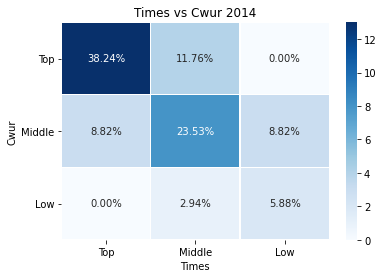

In [32]:
cf_matrix = confusion_matrix(data2014.times_world_rank,data2014.cwur_world_rank )
sns.heatmap(cf_matrix, annot=(cf_matrix/cf_matrix.sum()).round(4), fmt='.2%', cmap='Blues',linewidths = .1,
            xticklabels = ['Top','Middle','Low'],yticklabels=['Top','Middle','Low'])
plt.title('Times vs Cwur 2014', fontsize=12)
plt.xlabel("Times", fontsize =10)
plt.ylabel("Cwur", fontsize =10)
plt.yticks(rotation=360) 

score_cal(data2014.times_world_rank,data2014.cwur_world_rank)

plt.savefig(' Times vs Cwur 2014' + '.png', width=150,height = 150) 

In [33]:
score_cal(data2014.times_world_rank,data2014.cwur_world_rank)

,f1_score,accuracy,precision,recall
0,0.682066,0.676471,0.694938,0.676471


### Times vs Shanghai

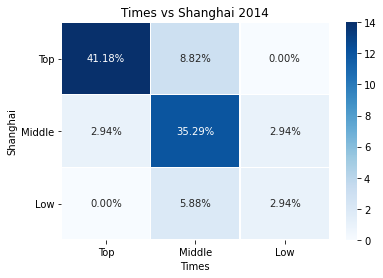

In [34]:
cf_matrix = confusion_matrix(data2014.times_world_rank,data2014.shanghai_world_rank )
sns.heatmap(cf_matrix, annot=(cf_matrix/cf_matrix.sum()).round(4), fmt='.2%', cmap='Blues',linewidths = .1,
            xticklabels = ['Top','Middle','Low'],yticklabels=['Top','Middle','Low'])
plt.title('Times vs Shanghai 2014', fontsize=12)
plt.xlabel("Times", fontsize =10)
plt.ylabel("Shanghai", fontsize =10)
plt.yticks(rotation=360) 
score_cal(data2014.times_world_rank,data2014.shanghai_world_rank)

plt.savefig(' Times vs Shanghai 2014' + '.png', width=150,height = 150) 

In [35]:
score_cal(data2014.times_world_rank,data2014.shanghai_world_rank)

,f1_score,accuracy,precision,recall
0,0.79158,0.794118,0.801442,0.794118


### CWUR vs Shanghai

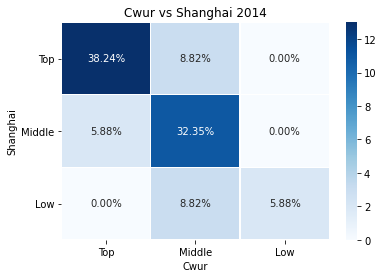

In [36]:
cf_matrix = confusion_matrix(data2014.cwur_world_rank,data2014.shanghai_world_rank )
sns.heatmap(cf_matrix, annot=(cf_matrix/cf_matrix.sum()).round(4), fmt='.2%', cmap='Blues',linewidths = .1,
            xticklabels = ['Top','Middle','Low'],yticklabels=['Top','Middle','Low'])
plt.title('Cwur vs Shanghai 2014', fontsize=12)
plt.xlabel("Cwur", fontsize =10)
plt.ylabel("Shanghai", fontsize =10)
plt.yticks(rotation=360) 

score_cal(data2014.cwur_world_rank,data2014.shanghai_world_rank)

plt.savefig(' Cwur vs Shanghai 2014' + '.png', width=150,height = 150) 

In [37]:
score_cal(data2014.cwur_world_rank,data2014.shanghai_world_rank)

,f1_score,accuracy,precision,recall
0,0.759113,0.764706,0.802307,0.764706


# Year 2015

In [38]:
times2015 = times[times['year'] == 2015]
cwur2015 = cwur[cwur['year'] == 2015]
shanghai2015 = shanghai[shanghai['year'] == 2015]

times2015 = times2015[["world_rank","university_name"]].rename(columns={"world_rank":"times_world_rank"}).head(100)
cwur2015 = cwur2015[["world_rank","institution"]].rename(columns={"world_rank":"cwur_world_rank","institution":"university_name"}).head(100)
shanghai2015 = shanghai2015[["world_rank","university_name"]].rename(columns={"world_rank":"shanghai_world_rank"}).head(100)

times2015['times_world_rank'] = times2015['times_world_rank'].apply(lambda x : rank_data(x))
cwur2015['cwur_world_rank'] = cwur2015['cwur_world_rank'].apply(lambda x : rank_data(x))
shanghai2015['shanghai_world_rank'] = shanghai2015['shanghai_world_rank'].apply(lambda x : rank_data(x))

data2015 = pd.merge(pd.merge(times2015,cwur2015),shanghai2015)
data2015.shape #35개의 대학이 겹침

(35, 4)

In [39]:
data2015

,times_world_rank,university_name,cwur_world_rank,shanghai_world_rank
0,1,California Institute of Technology,1,1
1,1,Harvard University,1,1
2,1,University of Oxford,1,1
3,1,Stanford University,1,1
4,1,University of Cambridge,1,1
5,1,Princeton University,1,1
6,1,"University of California, Berkeley",1,1
7,1,Yale University,1,1
8,1,University of Chicago,1,1
9,1,"University of California, Los Angeles",1,1


### Times vs CWUR

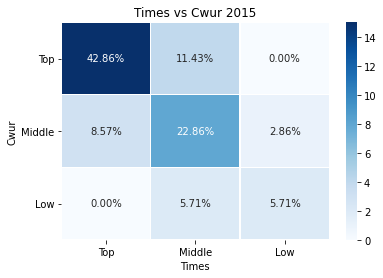

In [40]:
cf_matrix = confusion_matrix(data2015.times_world_rank,data2015.cwur_world_rank )
sns.heatmap(cf_matrix, annot=(cf_matrix/cf_matrix.sum()).round(4), fmt='.2%', cmap='Blues',linewidths = .1,
            xticklabels = ['Top','Middle','Low'],yticklabels=['Top','Middle','Low'])
plt.title('Times vs Cwur 2015', fontsize=12)
plt.xlabel("Times", fontsize =10)
plt.ylabel("Cwur", fontsize =10)
plt.yticks(rotation=360) 

score_cal(data2015.times_world_rank,data2015.cwur_world_rank)


plt.savefig(' Times vs Cwur 2015' + '.png', width=150,height = 150) 

In [41]:
score_cal(data2015.times_world_rank,data2015.cwur_world_rank)

,f1_score,accuracy,precision,recall
0,0.71645,0.714286,0.72449,0.714286


### Times vs Shanghai

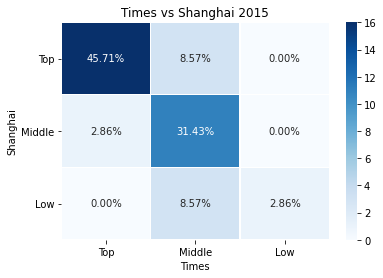

In [42]:
cf_matrix = confusion_matrix(data2015.times_world_rank,data2015.shanghai_world_rank )
sns.heatmap(cf_matrix, annot=(cf_matrix/cf_matrix.sum()).round(4), fmt='.2%', cmap='Blues',linewidths = .1,
            xticklabels = ['Top','Middle','Low'],yticklabels=['Top','Middle','Low'])
plt.title('Times vs Shanghai 2015', fontsize=12)
plt.xlabel("Times", fontsize =10)
plt.ylabel("Shanghai", fontsize =10)
plt.yticks(rotation=360) 
score_cal(data2015.times_world_rank,data2015.shanghai_world_rank)

plt.savefig(' Times vs Shanghai 2015' + '.png', width=150,height = 150) 

In [43]:
score_cal(data2015.times_world_rank,data2015.shanghai_world_rank)

,f1_score,accuracy,precision,recall
0,0.788352,0.8,0.847059,0.8


### CWUR vs Shanghai

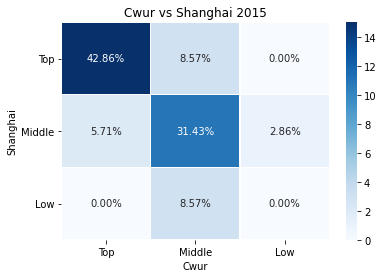

In [95]:
cf_matrix = confusion_matrix(data2015.cwur_world_rank,data2015.shanghai_world_rank )
sns.heatmap(cf_matrix, annot=(cf_matrix/cf_matrix.sum()).round(4), fmt='.2%', cmap='Blues',linewidths = .1,
            xticklabels = ['Top','Middle','Low'],yticklabels=['Top','Middle','Low'])
plt.title('Cwur vs Shanghai 2015', fontsize=12)
plt.xlabel("Cwur", fontsize =10)
plt.ylabel("Shanghai", fontsize =10)
plt.yticks(rotation=360) 

score_cal(data2015.cwur_world_rank,data2015.shanghai_world_rank)


plt.savefig(' Cwur vs Shanghai 2015' + '.png', width=150,height = 150) 

In [44]:
score_cal(data2015.cwur_world_rank,data2015.shanghai_world_rank)

,f1_score,accuracy,precision,recall
0,0.724687,0.742857,0.712605,0.742857


# Result

+ 순위가 내려갈 수록 겹치는 대학이 많지 않음
+ 하나에서 상위로 평가된경우 다른곳에서 하위로 평가된것은 없는 것으로 확인 되어짐
+ 4개 또는 5개등급으로 나누어보아도 좋을 것같음 - 해봤지만 별로였음
+ 하나에서는 TOP 다른곳에서는 middle로 평가된 경우를 찾아보아 각 평가의 기준을 합칠 경우 그 학교가 어떻게 평가될것인지 확인해보는것도 좋을것같음